# GHOST - example usage
Solving the linear advection equation on a periodic square with a sinusoidal initial condition

In [10]:
import sys  
import numpy as np
sys.path.insert(0, '../src')
from Mesh import Mesh2D
from Solver import Solver

# read in a regular 4x4x2 triangular grid in GMSH format
mesh = Mesh2D("advection_demo", "../mesh/square_L1/M4.msh")

# define boundaries
left = np.array([1.0,0.0,0.0]) 
right = np.array([1.0,0.0,1.0])
bottom = np.array([0.0,1.0,0.0])
top = np.array([0.0,1.0,1.0])
mesh.add_bc_on_hyperplanes([left,right,bottom,top],[1,2,3,4])

# define periodicity for left/right and top/bottom
mesh.make_periodic((1,2),[1]) 
mesh.make_periodic((3,4),[0])

# set polynomial degree of discretization
p = 3

# set volume and facet quadrature degrees
volume_quadrature_degree = 2*p
facet_quadrature_degree = 2*p+1

# set wave angle and speed
theta = np.pi/4
a = np.sqrt(2)

Set up a weak-form modal DG solver with RK4 time-marching and a central numerical flux

In [11]:
advection_solver = Solver(
    {   "project_title": "advection_demo",
        "problem": "constant_advection",
        "initial_condition": "sine",
        "wavelength": np.ones(2),
        "wave_speed": a*np.array([np.cos(theta),np.sin(theta)]),
        "upwind_parameter": 0.0,
        "integration_type": "quadrature",
        "solution_degree": 3,
        "volume_quadrature_degree": volume_quadrature_degree,
        "facet_quadrature_degree": facet_quadrature_degree,
        "solution_representation": "modal",
        "form": "weak",
        "correction": "c_dg",
        "time_integrator": "rk44",
        "final_time": 1.0/(a*max(np.abs(np.cos(theta)),
                            np.abs(np.sin(theta)))),
        "time_step_scale": 0.0025},
         mesh)

Run the solver for one period using specified parameters and mesh

In [12]:
advection_solver.run(restart=False)

Post-process and generate plots of numerical and exact solutions

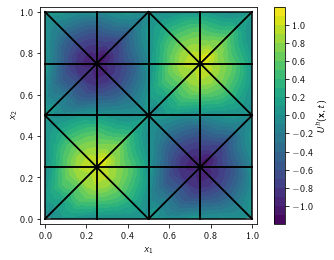

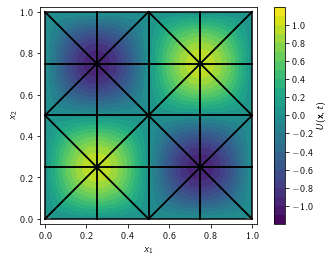

In [14]:
advection_solver.post_process()
advection_solver.plot(plot_curves=True,plot_exact=True)